**importing Library**



In [0]:
from keras.models import Sequential ,load_model 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt 
from PIL import Image
from sklearn.model_selection import train_test_split

**input image dimensions and train/test data_path**

In [0]:
m,n = 240,240
test_data='/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/test/'
train_data='/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/train/'

In [0]:
classes=os.listdir(train_data)
x=[]
y=[]
count = 0
for fol in classes:
    print (fol)
    imgfiles=os.listdir(train_data + '//' + fol);
    for img in imgfiles:
        try:
            im=Image.open(train_data+'//'+fol+'//'+img);
            im=im.convert(mode='RGB')
            imrs=im.resize((m,n))
            imrs=img_to_array(imrs)/255;
            imrs=imrs.transpose(2,0,1);
            imrs=imrs.reshape(3,m,n);
            x.append(imrs)
            y.append(count)
        except:
            pass
    count += 1

x=np.array(x);
y=np.array(y);

Knife
Handgun
Rifle


In [0]:
batch_size=32
nb_classes=len(classes)
nb_epoch=18
print("i have {} classes".format(nb_classes))

i have 3 classes


In [0]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.1,random_state=4)

In [0]:
#y_train.shape
#x_test
#y_test
print("My train_data loook like this {} 769 images for 3 classes with size 240 by 240".format(x_train.shape))
print(x_train.shape[0:])
input_shape=(3,240,240)
print(input_shape)

My train_data loook like this (769, 3, 240, 240) 769 images for 3 classes with size 240 by 240
(769, 3, 240, 240)
(3, 240, 240)


**Visualisation des Train set et Testset **

In [0]:
plt.scatter(X_train, Y_train, c='blue', label='Train set')
plt.scatter(X_test, X_test, c='red', label='Test set')
plt.legend()

**Convert Data to  one-hot vector**

In [0]:
uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

**Builld The Cnn Model architector**

***I'm gone to builed My model here
"Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output"
By taking  feature maps creating from the original data,






border_mode=same retrn 4*4 matrix to making the output feature map's size same as the input's

In [0]:
model= Sequential()
model.add(Convolution2D(128, kernel_size=(3,3), activation='relu' , border_mode='same', input_shape=input_shape))

model.add(Convolution2D(64 , kernel_size=(3,3), activation='relu' ,border_mode='same'))
#model.add(MaxPooling2D(pool_size=(2, 2))

model.add(Dropout(0.2)) 

model.add(Convolution2D(32,kernel_size=(3,3),border_mode='same',activation='relu'))
model.add(Convolution2D(16,kernel_size=(3,3),border_mode='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes,activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(3, 240, 2..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 128)       3584      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        73792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 16)       

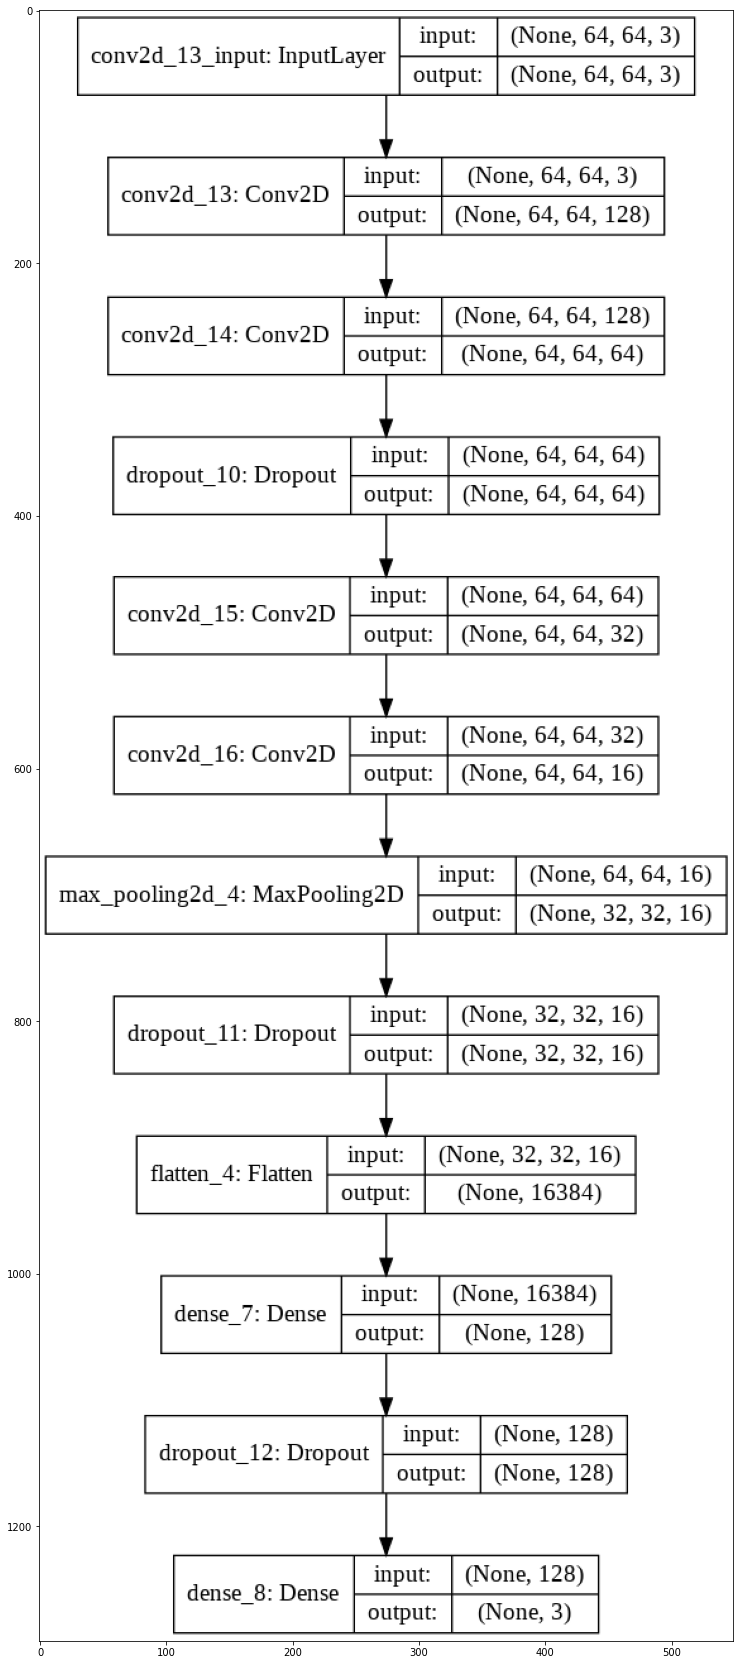

In [0]:
from keras.utils import plot_model
import matplotlib.image as mpimg
model_diag='/content/drive/My Drive/Colab Notebooks/WeaponProject/'

plot_model(model, to_file=model_diag+'model_dig.png',
           show_shapes=True,
           show_layer_names=True)

img=mpimg.imread(model_diag+'model_dig.png')
plt.figure(figsize=(60,30))
implt=plt.imshow(img)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [0]:
nb_epoch=18
batch_size=32
history=model.fit(x_train,Y_train,batch_size=batch_size,
                  nb_epoch=nb_epoch,verbose=1,
                  validation_data=(x_test, Y_test))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 769 samples, validate on 86 samples
Epoch 1/18
769/769 [==============================] - 24s 32ms/step - loss: 1.0989 - accuracy: 0.3797 - val_loss: 1.1203 - val_accuracy: 0.3372
Epoch 2/18
769/769 [==============================] - 24s 31ms/step - loss: 1.0815 - accuracy: 0.4265 - val_loss: 1.0383 - val_accuracy: 0.4767
Epoch 3/18
769/769 [==============================] - 24s 31ms/step - loss: 1.0360 - accuracy: 0.4993 - val_loss: 1.0740 - val_accuracy: 0.4767
Epoch 4/18
769/769 [==============================] - 24s 31ms/step - loss: 1.0323 - accuracy: 0.4928 - val_loss: 1.1032 - val_accuracy: 0.3140
Epoch 5/18
769/769 [==============================] - 23s 31ms/step - loss: 1.0082 - accuracy: 0.4850 - val_loss: 1.2513 - val_accuracy: 0.4186
Epoch 6/18
769/769 [==============================] - 23s 30ms/step - loss: 1.0125 - accuracy: 0.4915 - val_loss: 1.0975 - val_accuracy: 0.5116
Epoch 7/18
769/769 [==============================] - 23s 30ms/step - loss: 0.9885 - accura

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/WeaponProject/model_2.h5")

In [0]:
score=model.evaluate(x_test, y_test , verbose=1)
print("Test loss____", score[0])
print("Test accurcy____",score[1])

In [0]:
pickle_out=open("/content/drive/My Drive/Colab Notebooks/WeaponProject/ChottModel2.pickle","wb")
pickle.dump(history.history,pickle_out)
pickle_out.close()

In [0]:
pickle_in=open("/content/drive/My Drive/Colab Notebooks/WeaponProject/ChottModel2.pickle","rb")
saved_history=pickle.load(pickle_in)
print("this is my saved History of training".format(saved_history))

this is my saved History of training


**PloTiing The resalts**

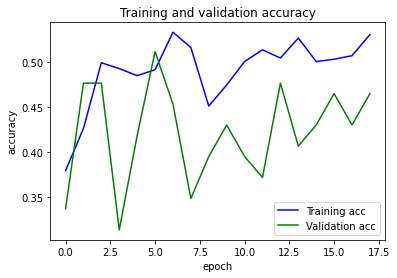

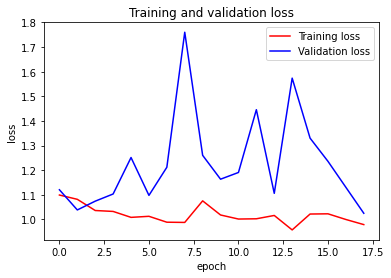

In [0]:
#print(f'Test loss of CNN: {score[0]} / Test accuracy: {score[1]}')
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

**1-load saved Model**

In [0]:
#loss_and_metrics=model.evaluate(X_test,y_test,batch_size=128)
weapon_model=load_model('/content/drive/My Drive/Colab Notebooks/WeaponProject/model_2.h5')
weapon_model.get_weights()
weapon_model.optimizer

**Predection**

**1-with fct evaluate**
"the classification metrics "

In [0]:
weapon_model.evaluate(x_test,y_test)

**2-model.predect**
" confusion matrix"

**Confusion Matrics**

In [0]:
y_pred=weapon_model.predict_classes( x_test)
print(classification_report(np.argmax(y_test,axis=0), y_pred))


In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

In [0]:
import pylab as pl
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

**Test**

In [0]:
files=os.listdir(test_data)

16462ddae6a3055a.jpg


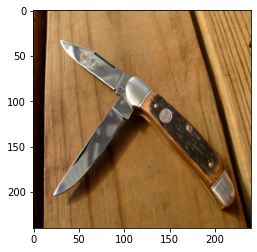

In [0]:
img=files[3]
print (img)
im = Image.open(test_data + img)
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255
#imrs=imrs.transpose(2,0,1)
imrs=imrs.reshape(m,n,-1)
plt.imshow(imrs)

In [0]:
x=[]
x.append(imrs)
x=np.array(x)
predictions = model.predict(x)
print ( predictions)

ValueError: ignored

In [0]:
pred_class=model.predict_classes(x)
print(pred_class)


ValueError: ignored

**Test with all images in test directory**

In [0]:
x=[]
m,n = 64,64
weapon_model=load_model('/content/drive/My Drive/Colab Notebooks/WeaponProject/Weapon_model.h5')
path = '/content/drive/My Drive/Colab Notebooks/WeaponProject/Dataset/test/'
files=os.listdir(path)

In [0]:
x=[]
for i in files:
    im = Image.open(path + i)
    imrs = im.resize((m,n))
    imrs=img_to_array(imrs)/255
    imrs=imrs.transpose(2,0,1)
    imrs=imrs.reshape(m,n,-1)
    x.append(imrs)
x=np.array(x);
predictions = model.predict(x)
print (predictions)


ValueError: ignored